In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ft-global-business-school-top-100-mba-ranking-2023/FT Global Business School MBA Ranking 2023.csv


In [2]:
import pandas as pd


df = pd.read_csv('/kaggle/input/ft-global-business-school-top-100-mba-ranking-2023/FT Global Business School MBA Ranking 2023.csv')

# Display the first few rows of the DataFrame
df.head()


,Rank,School Name,Female faculty (%),International mobility rank,Salary today (US$) **,International students (%),Weighted salary (US$),International board (%),Value for money rank,Audit year *,...,Careers service rank,Overall satisfaction **,Carbon footprint rank,Rank in 2022,Faculty with doctorates (%),Female students (%),International course experience rank,Women on board (%),Rank in 2021,Three-year average rank
0,1,Columbia Business School,26,49,"228,425",57,"226,359",39,80,"2,019",...,23,9.51,53,2.0,96,44,48,19,NaN,NaN
1,2,Insead,22,9,"202,568",95,"198,363",89,15,"2,020",...,43,9.31,53,3.0,99,36,7,50,1.0,2.0
2,3,Iese Business School,33,19,"182,278",88,"181,270",90,92,"2,022",...,5,9.61,6,10.0,100,37,5,29,4.0,6.0
3,4,Harvard Business School,33,58,"235,177",38,"235,019",0 ‡,89,"2,018",...,20,9.69,14,3.0,88,46,57,0 ‡,NaN,NaN
4,4,Stanford Graduate School of Business,26,56,"253,435",46,"248,669",25,72,"2,022",...,11,9.98,53,6.0,89,44,27,31,NaN,NaN


In [3]:
# Check the shape of the DataFrame
df.shape


(100, 28)

In [4]:
# Check the data types of each column
df.dtypes


Rank                                      int64
School Name                              object
Female faculty (%)                        int64
International mobility rank               int64
Salary today (US$) **                    object
International students (%)                int64
Weighted salary (US$)                    object
International board (%)                  object
Value for money rank                      int64
Audit year *                             object
Career progress rank                      int64
FT research rank                          int64
Aims achieved (%)                         int64
Sector diversity rank                     int64
Location, by primary campus              object
Alumni network rank                       int64
International faculty (%)                object
ESG and net zero teaching rank            int64
Careers service rank                      int64
Overall satisfaction **                 float64
Carbon footprint rank                   

In [5]:
# List of columns to clean
cols_to_clean = ['Salary today (US$) **', 'Weighted salary (US$)', 'International board (%)', 'Audit year *', 'International faculty (%)', 'Women on board (%)']

# Clean the columns
for col in cols_to_clean:
    df[col] = df[col].str.replace(',', '')  # Remove comma separators
    df[col] = df[col].str.replace(' ‡', '')  # Remove special symbol for missing data
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, setting invalid parsing to NaN

# Display the first few rows of the cleaned DataFrame
df.head()


,Rank,School Name,Female faculty (%),International mobility rank,Salary today (US$) **,International students (%),Weighted salary (US$),International board (%),Value for money rank,Audit year *,...,Careers service rank,Overall satisfaction **,Carbon footprint rank,Rank in 2022,Faculty with doctorates (%),Female students (%),International course experience rank,Women on board (%),Rank in 2021,Three-year average rank
0,1,Columbia Business School,26,49,228425,57,226359,39.0,80,2019.0,...,23,9.51,53,2.0,96,44,48,19,NaN,NaN
1,2,Insead,22,9,202568,95,198363,89.0,15,2020.0,...,43,9.31,53,3.0,99,36,7,50,1.0,2.0
2,3,Iese Business School,33,19,182278,88,181270,90.0,92,2022.0,...,5,9.61,6,10.0,100,37,5,29,4.0,6.0
3,4,Harvard Business School,33,58,235177,38,235019,0.0,89,2018.0,...,20,9.69,14,3.0,88,46,57,0,NaN,NaN
4,4,Stanford Graduate School of Business,26,56,253435,46,248669,25.0,72,2022.0,...,11,9.98,53,6.0,89,44,27,31,NaN,NaN


In [6]:
# Top 10 business schools based on the 2023 rank
top_10_schools = df.nsmallest(10, 'Rank')

top_10_schools[['Rank', 'School Name', 'Location, by primary campus']]


,Rank,School Name,"Location, by primary campus"
0,1,Columbia Business School,US
1,2,Insead,France/Singapore
2,3,Iese Business School,Spain
3,4,Harvard Business School,US
4,4,Stanford Graduate School of Business,US
5,6,SDA Bocconi School of Management,Italy
6,7,University of California at Berkeley: Haas,US
7,8,Cornell University: Johnson,US
8,9,"Northwestern University, Kellogg School of Man...",US
9,10,Yale School of Management,US


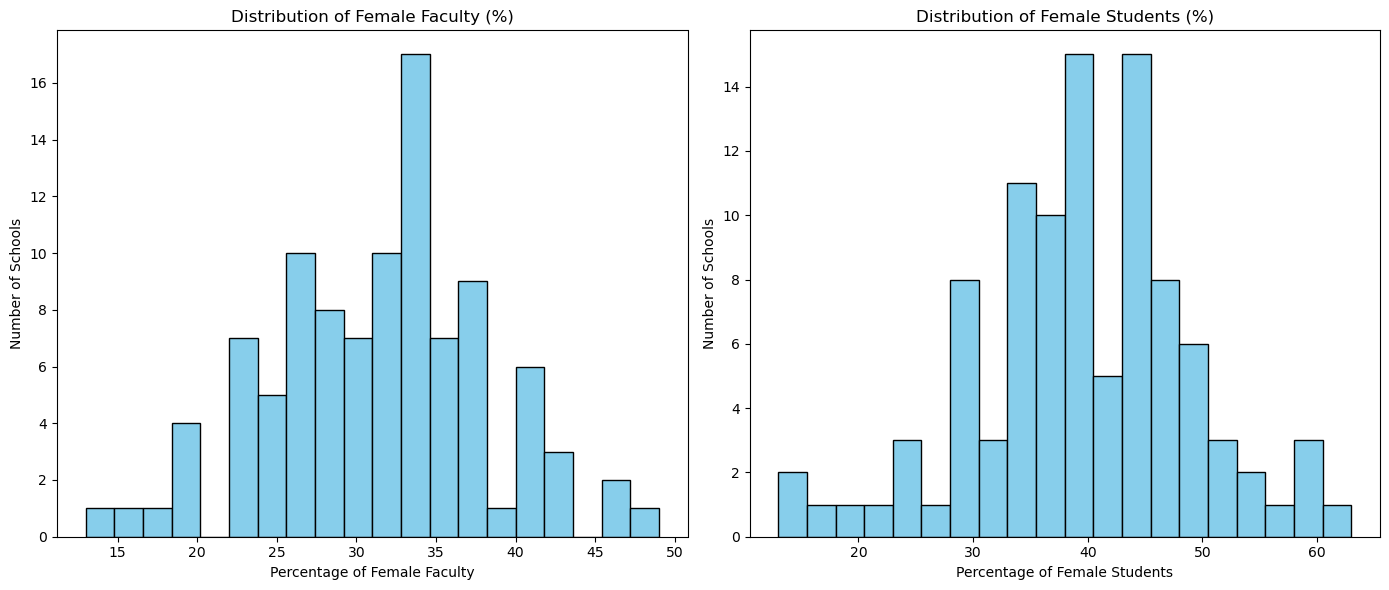

In [7]:
import matplotlib.pyplot as plt

# Plotting histogram for 'Female faculty (%)' and 'Female students (%)'
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.hist(df['Female faculty (%)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Female Faculty (%)')
plt.xlabel('Percentage of Female Faculty')
plt.ylabel('Number of Schools')

plt.subplot(1,2,2)
plt.hist(df['Female students (%)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Female Students (%)')
plt.xlabel('Percentage of Female Students')
plt.ylabel('Number of Schools')

plt.tight_layout()
plt.show()


In [8]:
# Calculate the average weighted salary
avg_weighted_salary = df['Weighted salary (US$)'].mean()

avg_weighted_salary


152958.15

In [9]:
# Selecting a few columns for correlation analysis
selected_cols = ['Rank', 'Overall satisfaction **', 'Weighted salary (US$)', 'Career progress rank', 'International mobility rank']

# Calculating the correlation matrix
correlation_matrix = df[selected_cols].corr()

# Display the correlation matrix
correlation_matrix


,Rank,Overall satisfaction **,Weighted salary (US$),Career progress rank,International mobility rank
Rank,1.000000,-0.557154,-0.864507,0.343065,-0.003509
Overall satisfaction **,-0.557154,1.000000,0.672990,-0.179258,0.431363
Weighted salary (US$),-0.864507,0.672990,1.000000,-0.387320,0.249922
Career progress rank,0.343065,-0.179258,-0.387320,1.000000,0.108371
International mobility rank,-0.003509,0.431363,0.249922,0.108371,1.000000


In [10]:
# Selecting relevant columns
rank_cols = ['School Name', 'Rank', 'Rank in 2022', 'Rank in 2021']

# Filter for top 10 schools
top_10_ranks = top_10_schools[rank_cols]

# Display the data
top_10_ranks


,School Name,Rank,Rank in 2022,Rank in 2021
0,Columbia Business School,1,2.0,NaN
1,Insead,2,3.0,1.0
2,Iese Business School,3,10.0,4.0
3,Harvard Business School,4,3.0,NaN
4,Stanford Graduate School of Business,4,6.0,NaN
5,SDA Bocconi School of Management,6,13.0,12.0
6,University of California at Berkeley: Haas,7,14.0,NaN
7,Cornell University: Johnson,8,17.0,15.0
8,"Northwestern University, Kellogg School of Man...",9,5.0,6.0
9,Yale School of Management,10,9.0,4.0


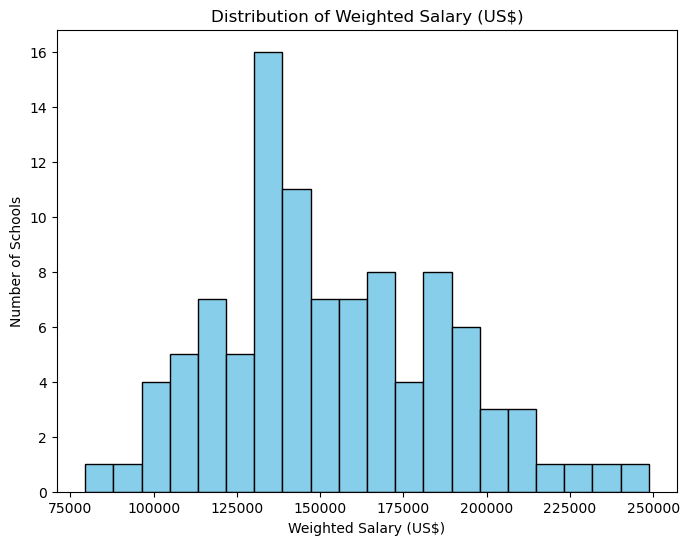

In [11]:
# Plotting histogram for 'Weighted salary (US$)'
plt.figure(figsize=(8,6))
plt.hist(df['Weighted salary (US$)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Weighted Salary (US$)')
plt.xlabel('Weighted Salary (US$)')
plt.ylabel('Number of Schools')
plt.show()


In [12]:
# Top 10 schools with the highest 'Weighted salary (US$)'
top_10_salary_schools = df.nlargest(10, 'Weighted salary (US$)')

top_10_salary_schools[['Rank', 'School Name', 'Weighted salary (US$)']]


,Rank,School Name,Weighted salary (US$)
4,4,Stanford Graduate School of Business,248669
3,4,Harvard Business School,235019
0,1,Columbia Business School,226359
12,11,University of Chicago: Booth,218068
6,7,University of California at Berkeley: Haas,213321
8,9,"Northwestern University, Kellogg School of Man...",209337
11,11,MIT: Sloan,207100
14,15,Dartmouth College: Tuck,201451
1,2,Insead,198363
18,19,New York University: Stern,198024


Top 10 business schools with the highest weighted salaries in 2023 according to the Financial Times MBA rankings:

Stanford Graduate School of Business: $248,669

Harvard Business School: $235,019

Columbia Business School: $226,359

University of Chicago: Booth: $218,068

University of California at Berkeley: Haas: $213,321

Northwestern University, Kellogg School of Management: $209,337

MIT: Sloan: $207,100

Dartmouth College: Tuck: $201,451

Insead: $198,363

New York University: Stern: $198,024

In [13]:
# Top 10 schools with the highest 'Overall satisfaction **'
top_10_satisfaction_schools = df.nlargest(10, 'Overall satisfaction **')

top_10_satisfaction_schools[['Rank', 'School Name', 'Overall satisfaction **']]


,Rank,School Name,Overall satisfaction **
4,4,Stanford Graduate School of Business,9.98
7,8,Cornell University: Johnson,9.94
17,17,University of Virginia: Darden,9.71
39,40,University of Florida: Warrington,9.71
56,57,University of Maryland: Smith,9.71
14,15,Dartmouth College: Tuck,9.70
3,4,Harvard Business School,9.69
23,23,Shanghai University of Finance and Economics: ...,9.67
71,71,University of Notre Dame: Mendoza,9.63
2,3,Iese Business School,9.61


* Stanford Graduate School of Business: 9.98
* Cornell University: Johnson: 9.94
* University of Virginia: Darden: 9.71
* University of Florida: Warrington: 9.71
* University of Maryland: Smith: 9.71
* Dartmouth College: Tuck: 9.70
* Harvard Business School: 9.69
* Shanghai University of Finance and Economics: 9.67
* University of Notre Dame: Mendoza: 9.63
* Iese Business School: 9.61

In [14]:
# Calculate the correlation between 'Weighted salary (US$)' and 'Overall satisfaction **'
salary_satisfaction_corr = df['Weighted salary (US$)'].corr(df['Overall satisfaction **'])

salary_satisfaction_corr


0.6729895052659622

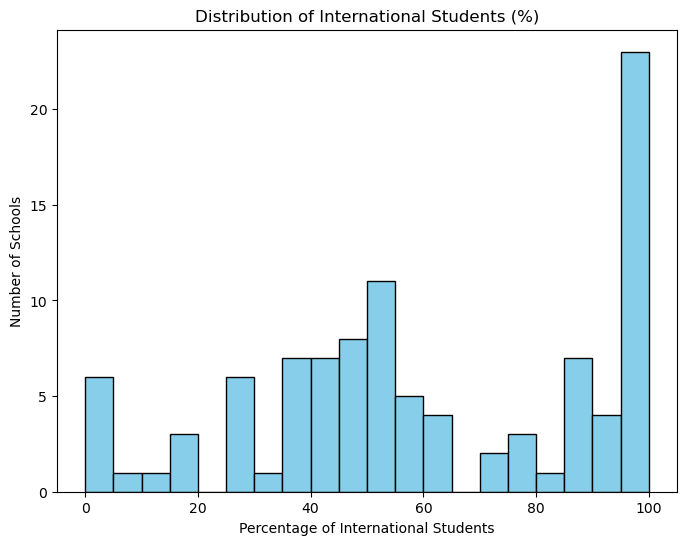

In [15]:
# Plotting histogram for 'International students (%)'
plt.figure(figsize=(8,6))
plt.hist(df['International students (%)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of International Students (%)')
plt.xlabel('Percentage of International Students')
plt.ylabel('Number of Schools')
plt.show()


In [16]:
# Calculate the average overall satisfaction across all schools
avg_overall_satisfaction = df['Overall satisfaction **'].mean()

avg_overall_satisfaction


9.016300000000003

In [17]:
# Calculate the average weighted salary by location
avg_salary_by_location = df.groupby('Location, by primary campus')['Weighted salary (US$)'].mean().sort_values(ascending=False)

avg_salary_by_location


Location, by primary campus
Italy                            192815.000000
US                               169783.173913
China                            165497.666667
India                            157034.333333
Switzerland                      156632.000000
France/Singapore                 154225.000000
Spain                            152460.250000
Singapore                        146268.000000
UK                               141995.500000
Hong Kong                        140017.666667
South Korea                      135419.000000
France/Italy/Spain/UK/Germany    130888.000000
France                           124750.000000
Germany                          120354.000000
Australia                        114803.000000
Ireland                          114689.000000
Canada                           110561.250000
Portugal                         109899.000000
Netherlands                      109023.000000
Belgium                          103168.000000
Name: Weighted salary (US$), dty

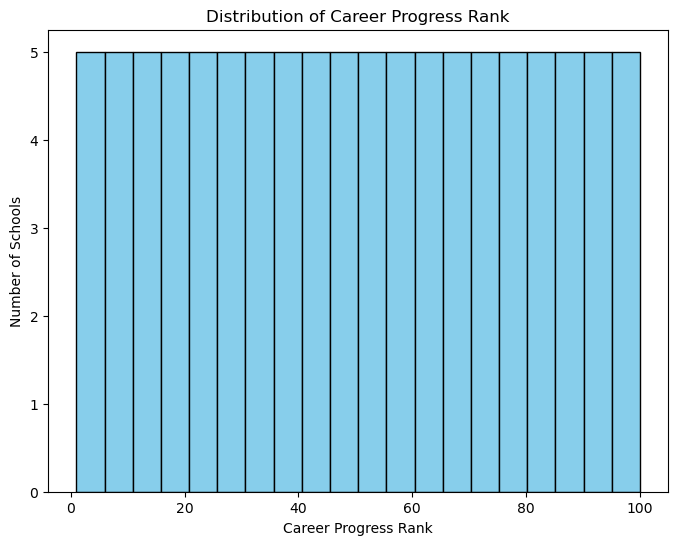

In [18]:
# Plotting histogram for 'Career progress rank'
plt.figure(figsize=(8,6))
plt.hist(df['Career progress rank'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Career Progress Rank')
plt.xlabel('Career Progress Rank')
plt.ylabel('Number of Schools')
plt.show()


In [19]:
# Calculate the correlation between 'International students (%)' and 'International faculty (%)'
international_corr = df['International students (%)'].corr(df['International faculty (%)'])

international_corr


0.7855925206358271

In [20]:
# Top 10 schools with the highest 'International students (%)'
top_10_international_students = df.nlargest(10, 'International students (%)')

top_10_international_students[['Rank', 'School Name', 'International students (%)']]


,Rank,School Name,International students (%)
26,27,ESCP Business School,100
65,66,Bayes Business School (formerly Cass),100
85,86,Audencia,100
89,90,"Tias Business School, Tilburg University",100
32,32,IMD — International Institute for Management D...,99
22,23,University of Cambridge: Judge,98
69,70,Essec Business School,98
75,76,EMLyon Business School,98
99,100,Eada Business School Barcelona,98
16,17,HEC Paris,97


In [21]:
# Top 10 schools with the highest 'International faculty (%)'
top_10_international_faculty = df.nlargest(10, 'International faculty (%)')

top_10_international_faculty[['Rank', 'School Name', 'International faculty (%)']]


,Rank,School Name,International faculty (%)
32,32,IMD — International Institute for Management D...,98.0
36,37,Imperial College Business School,96.0
1,2,Insead,90.0
26,27,ESCP Business School,86.0
15,16,London Business School,85.0
22,23,University of Cambridge: Judge,84.0
59,59,University of St Gallen,84.0
54,55,Warwick Business School,80.0
77,78,Durham University Business School,80.0
69,70,Essec Business School,78.0


In [22]:
# Calculate the correlation between 'Rank' and 'International students (%)'
rank_international_students_corr = df['Rank'].corr(df['International students (%)'])

rank_international_students_corr


0.0865366053506462

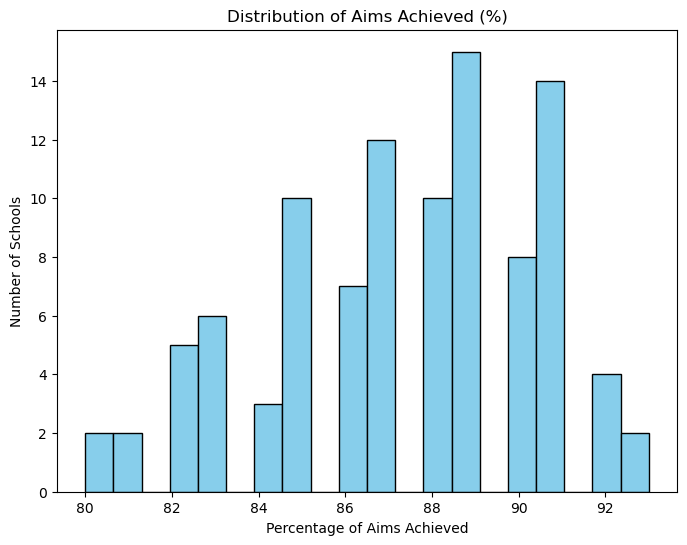

In [23]:
# Plotting histogram for 'Aims achieved (%)'
plt.figure(figsize=(8,6))
plt.hist(df['Aims achieved (%)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Aims Achieved (%)')
plt.xlabel('Percentage of Aims Achieved')
plt.ylabel('Number of Schools')
plt.show()


In [24]:
# Top 10 schools with the highest 'Aims achieved (%)'
top_10_aims_achieved = df.nlargest(10, 'Aims achieved (%)')

top_10_aims_achieved[['Rank', 'School Name', 'Aims achieved (%)']]


,Rank,School Name,Aims achieved (%)
4,4,Stanford Graduate School of Business,93
42,43,Michigan State University: Broad,93
7,8,Cornell University: Johnson,92
14,15,Dartmouth College: Tuck,92
15,16,London Business School,92
25,26,University of Michigan: Ross,92
0,1,Columbia Business School,91
3,4,Harvard Business School,91
9,10,Yale School of Management,91
10,11,Duke University's Fuqua School of Business,91


In [25]:
# Calculate the average 'Aims achieved (%)' across all schools
avg_aims_achieved = df['Aims achieved (%)'].mean()

avg_aims_achieved


87.41

In [26]:
# Calculate the correlation between 'Rank' and 'Aims achieved (%)'
rank_aims_achieved_corr = df['Rank'].corr(df['Aims achieved (%)'])

rank_aims_achieved_corr


-0.6263867356048352

In [27]:
# Top 10 schools with the highest 'Career progress rank'
top_10_career_progress = df.nsmallest(10, 'Career progress rank')

top_10_career_progress[['Rank', 'School Name', 'Career progress rank']]


,Rank,School Name,Career progress rank
50,51,Indian Institute of Management Ahmedabad,1
4,4,Stanford Graduate School of Business,2
23,23,Shanghai University of Finance and Economics: ...,3
3,4,Harvard Business School,4
11,11,MIT: Sloan,5
47,48,Fudan University School of Management,6
51,52,Indian Institute of Management Bangalore,7
76,76,Indian Institute of Management Calcutta,8
19,20,Ceibs,9
90,90,Indian Institute of Management Lucknow,10


 Here are the top 10 business schools with the highest 'Career Progress Rank' in 2023 according to the Financial Times MBA rankings:

* Indian Institute of Management Ahmedabad: 1
* Stanford Graduate School of Business: 2
* Shanghai University of Finance and Economics: SUFE: 3
* Harvard Business School: 4
* MIT: Sloan: 5
* Fudan University School of Management: 6
* Indian Institute of Management Bangalore: 7
* Indian Institute of Management Calcutta: 8
* Ceibs: 9
* Indian Institute of Management Lucknow: 10

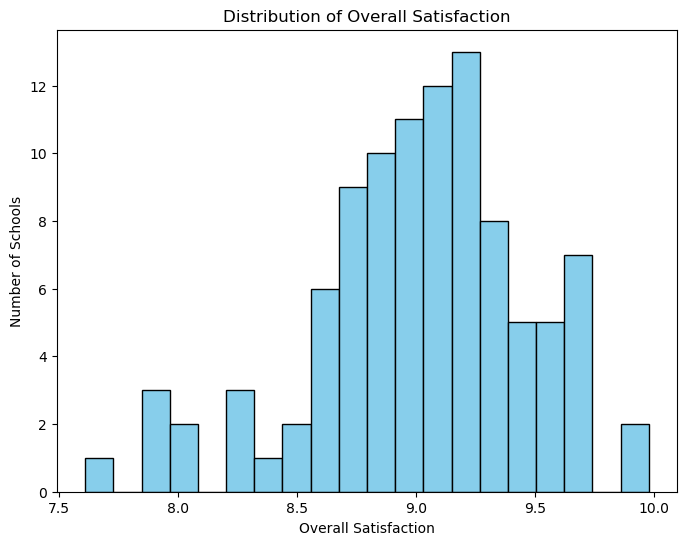

In [28]:
# Plotting histogram for 'Overall satisfaction **'
plt.figure(figsize=(8,6))
plt.hist(df['Overall satisfaction **'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Overall Satisfaction')
plt.xlabel('Overall Satisfaction')
plt.ylabel('Number of Schools')
plt.show()


In [29]:
# Calculate the correlation between 'Career progress rank' and 'Aims achieved (%)'
career_progress_aims_achieved_corr = df['Career progress rank'].corr(df['Aims achieved (%)'])

career_progress_aims_achieved_corr


0.05510202178944075

In [30]:
# Calculate the correlation between 'Rank' and 'Value for money rank'
rank_value_for_money_corr = df['Rank'].corr(df['Value for money rank'])

rank_value_for_money_corr


-0.2912215685317642

In [31]:
# Top 10 schools with the highest 'Value for money rank'
top_10_value_for_money = df.nsmallest(10, 'Value for money rank')

top_10_value_for_money[['Rank', 'School Name', 'Value for money rank']]


,Rank,School Name,Value for money rank
68,69,University of Massachusetts Amherst: Isenberg,1
39,40,University of Florida: Warrington,2
26,27,ESCP Business School,3
91,92,Brigham Young University: Marriott,4
60,61,University of Georgia: Terry,5
5,6,SDA Bocconi School of Management,6
58,59,University of Texas at Dallas: Jindal,7
46,47,Edhec Business School,8
93,94,University College Dublin: Smurfit,9
23,23,Shanghai University of Finance and Economics: ...,10


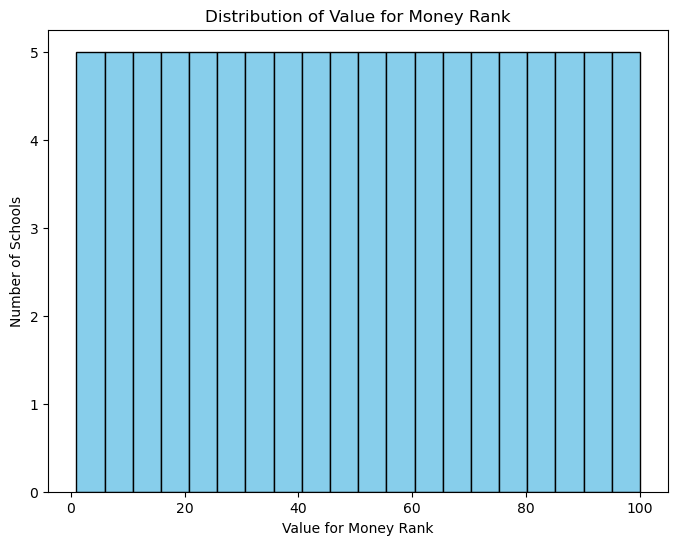

In [32]:
# Plotting histogram for 'Value for money rank'
plt.figure(figsize=(8,6))
plt.hist(df['Value for money rank'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Value for Money Rank')
plt.xlabel('Value for Money Rank')
plt.ylabel('Number of Schools')
plt.show()


In [33]:
# Calculate the correlation between 'Overall satisfaction **' and 'Value for money rank'
satisfaction_value_for_money_corr = df['Overall satisfaction **'].corr(df['Value for money rank'])

satisfaction_value_for_money_corr


0.1767559908322185

In [34]:
# Top 10 schools with the highest 'Faculty with doctorates (%)'
top_10_faculty_doctorates = df.nlargest(10, 'Faculty with doctorates (%)')

top_10_faculty_doctorates[['Rank', 'School Name', 'Faculty with doctorates (%)']]


,Rank,School Name,Faculty with doctorates (%)
2,3,Iese Business School,100
7,8,Cornell University: Johnson,100
8,9,"Northwestern University, Kellogg School of Man...",100
9,10,Yale School of Management,100
11,11,MIT: Sloan,100
13,14,UCLA Anderson School of Management,100
19,20,Ceibs,100
21,22,IE Business School,100
26,27,ESCP Business School,100
27,28,University of Oxford: Saïd,100


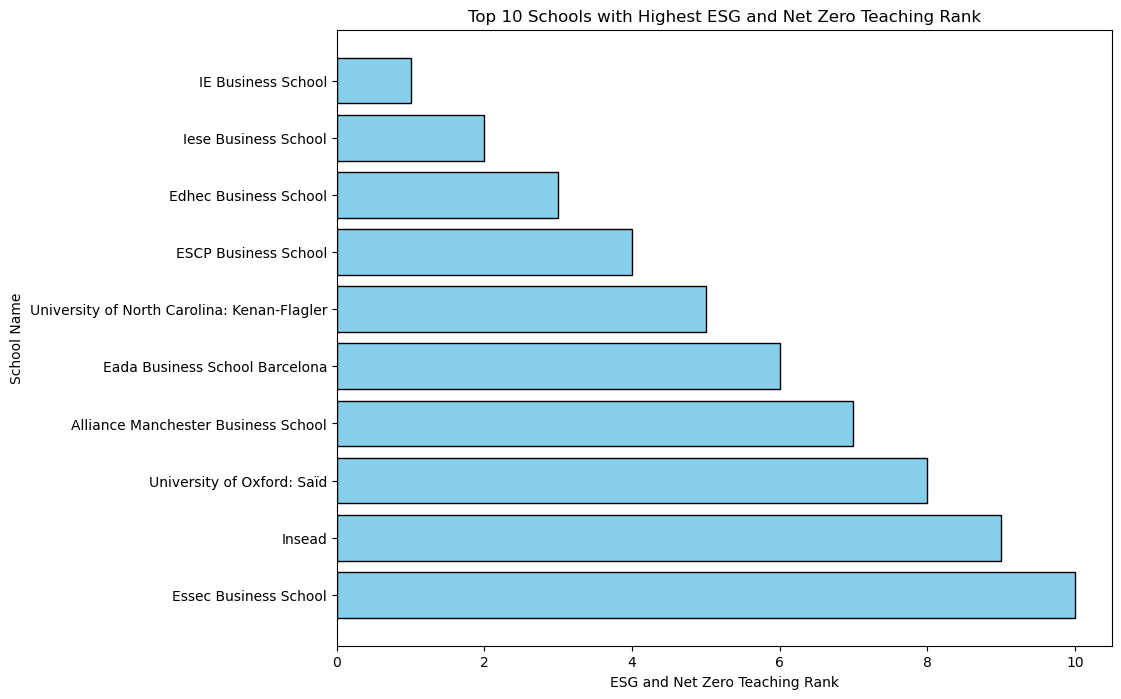

In [35]:
# Top 10 schools with the highest 'ESG and net zero teaching rank'
top_10_esg_teaching = df.nsmallest(10, 'ESG and net zero teaching rank')


# Plotting the top 10 schools with the highest 'ESG and net zero teaching rank'
plt.figure(figsize=(10,8))
plt.barh(top_10_esg_teaching['School Name'], top_10_esg_teaching['ESG and net zero teaching rank'], color='skyblue', edgecolor='black')
plt.title('Top 10 Schools with Highest ESG and Net Zero Teaching Rank')
plt.xlabel('ESG and Net Zero Teaching Rank')
plt.ylabel('School Name')
plt.gca().invert_yaxis()  # Invert y-axis to have the school with the highest rank at the top
plt.show()


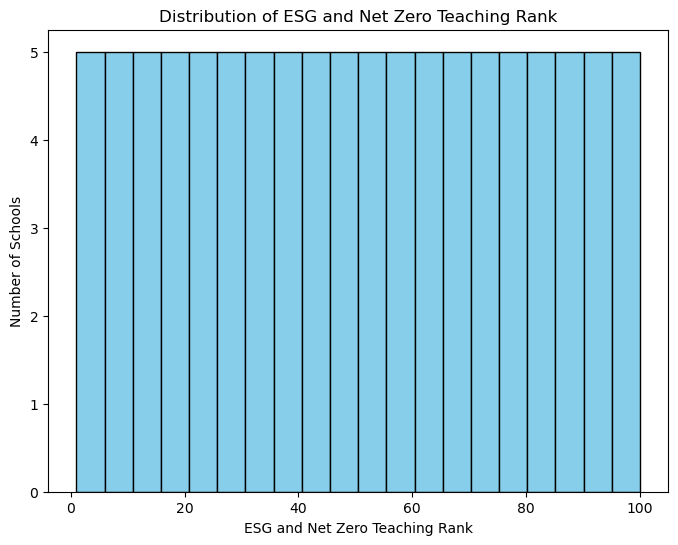

In [36]:
# Plotting histogram for 'ESG and net zero teaching rank'
plt.figure(figsize=(8,6))
plt.hist(df['ESG and net zero teaching rank'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of ESG and Net Zero Teaching Rank')
plt.xlabel('ESG and Net Zero Teaching Rank')
plt.ylabel('Number of Schools')
plt.show()


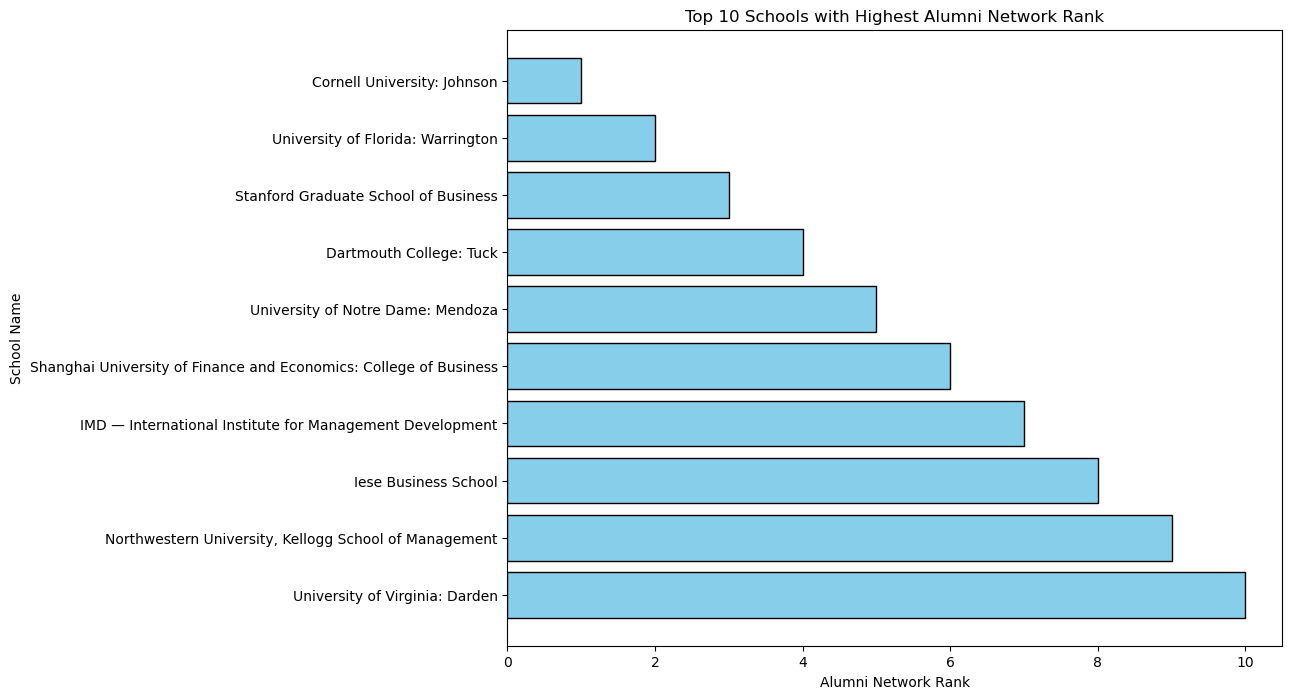

In [37]:
# Top 10 schools with the highest 'Alumni network rank'
top_10_alumni_network = df.nsmallest(10, 'Alumni network rank')

# Plotting the top 10 schools with the highest 'Alumni network rank'
plt.figure(figsize=(10,8))
plt.barh(top_10_alumni_network['School Name'], top_10_alumni_network['Alumni network rank'], color='skyblue', edgecolor='black')
plt.title('Top 10 Schools with Highest Alumni Network Rank')
plt.xlabel('Alumni Network Rank')
plt.ylabel('School Name')
plt.gca().invert_yaxis()  # Invert y-axis to have the school with the highest rank at the top
plt.show()


In [38]:
# Calculate the correlation between 'Rank' and 'Alumni network rank'
rank_alumni_network_corr = df['Rank'].corr(df['Alumni network rank'])

rank_alumni_network_corr


0.6024018178443542

In [39]:
# Top 10 schools with the highest 'Career service rank'
top_10_career_service = df.nsmallest(10, 'Careers service rank')

top_10_career_service[['Rank', 'School Name', 'Careers service rank']]


,Rank,School Name,Careers service rank
39,40,University of Florida: Warrington,1
64,64,Georgia Tech Scheller College of Business,2
7,8,Cornell University: Johnson,3
13,14,UCLA Anderson School of Management,4
2,3,Iese Business School,5
12,11,University of Chicago: Booth,6
18,19,New York University: Stern,7
48,49,Carnegie Mellon: Tepper,8
8,9,"Northwestern University, Kellogg School of Man...",9
60,61,University of Georgia: Terry,10


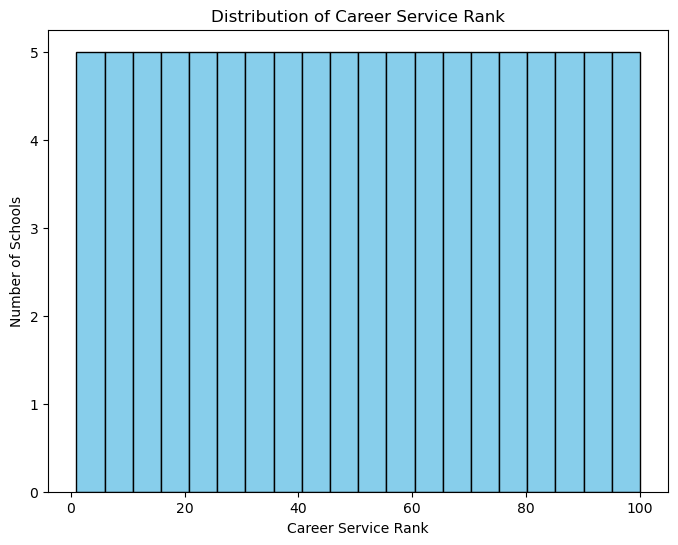

In [40]:
# Plotting histogram for 'Career service rank'
plt.figure(figsize=(8,6))
plt.hist(df['Careers service rank'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Career Service Rank')
plt.xlabel('Career Service Rank')
plt.ylabel('Number of Schools')
plt.show()


In [41]:
# Calculate the correlation between 'Overall satisfaction **' and 'Career service rank'
satisfaction_career_service_corr = df['Overall satisfaction **'].corr(df['Careers service rank'])

satisfaction_career_service_corr


-0.6997426218260091

In [42]:
# Top 10 schools with the highest 'International mobility rank'
top_10_international_mobility = df.nsmallest(10, 'International mobility rank')

top_10_international_mobility[['Rank', 'School Name', 'International mobility rank']]


,Rank,School Name,International mobility rank
16,17,HEC Paris,1
59,59,University of St Gallen,2
32,32,IMD — International Institute for Management D...,3
55,56,Mannheim Business School,4
62,63,"Rotterdam School of Management, Erasmus Univer...",5
46,47,Edhec Business School,6
26,27,ESCP Business School,7
89,90,"Tias Business School, Tilburg University",8
1,2,Insead,9
97,98,Frankfurt School of Finance and Management,10


In [43]:
# Calculate the correlation between 'Rank' and 'International mobility rank'
rank_international_mobility_corr = df['Rank'].corr(df['International mobility rank'])

rank_international_mobility_corr


-0.003509416368134346

In [44]:
# Top 10 schools with the highest 'International course experience rank'
top_10_international_course = df.nsmallest(10, 'International course experience rank')

top_10_international_course[['Rank', 'School Name', 'International course experience rank']]


,Rank,School Name,International course experience rank
26,27,ESCP Business School,1
84,85,The Lisbon MBA Catolica | Nova,2
29,30,Esade Business School,3
85,86,Audencia,4
2,3,Iese Business School,5
69,70,Essec Business School,6
1,2,Insead,7
30,31,Washington University: Olin,8
5,6,SDA Bocconi School of Management,9
16,17,HEC Paris,10


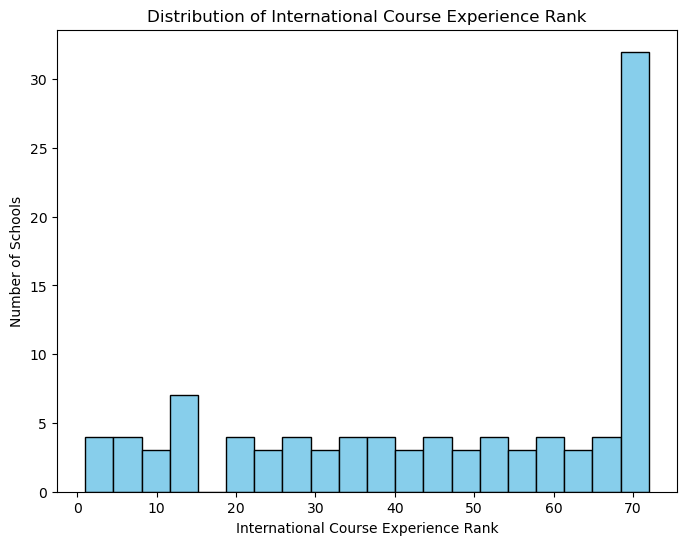

In [45]:
# Plotting histogram for 'International course experience rank'
plt.figure(figsize=(8,6))
plt.hist(df['International course experience rank'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of International Course Experience Rank')
plt.xlabel('International Course Experience Rank')
plt.ylabel('Number of Schools')
plt.show()


In [46]:
# Top 10 schools with the highest 'FT research rank'
top_10_research = df.nsmallest(10, 'FT research rank')

top_10_research[['Rank', 'School Name', 'FT research rank']]


,Rank,School Name,FT research rank
3,4,Harvard Business School,1
0,1,Columbia Business School,2
7,8,Cornell University: Johnson,3
12,11,University of Chicago: Booth,4
13,14,UCLA Anderson School of Management,5
58,59,University of Texas at Dallas: Jindal,6
4,4,Stanford Graduate School of Business,7
1,2,Insead,8
8,9,"Northwestern University, Kellogg School of Man...",9
10,11,Duke University's Fuqua School of Business,10


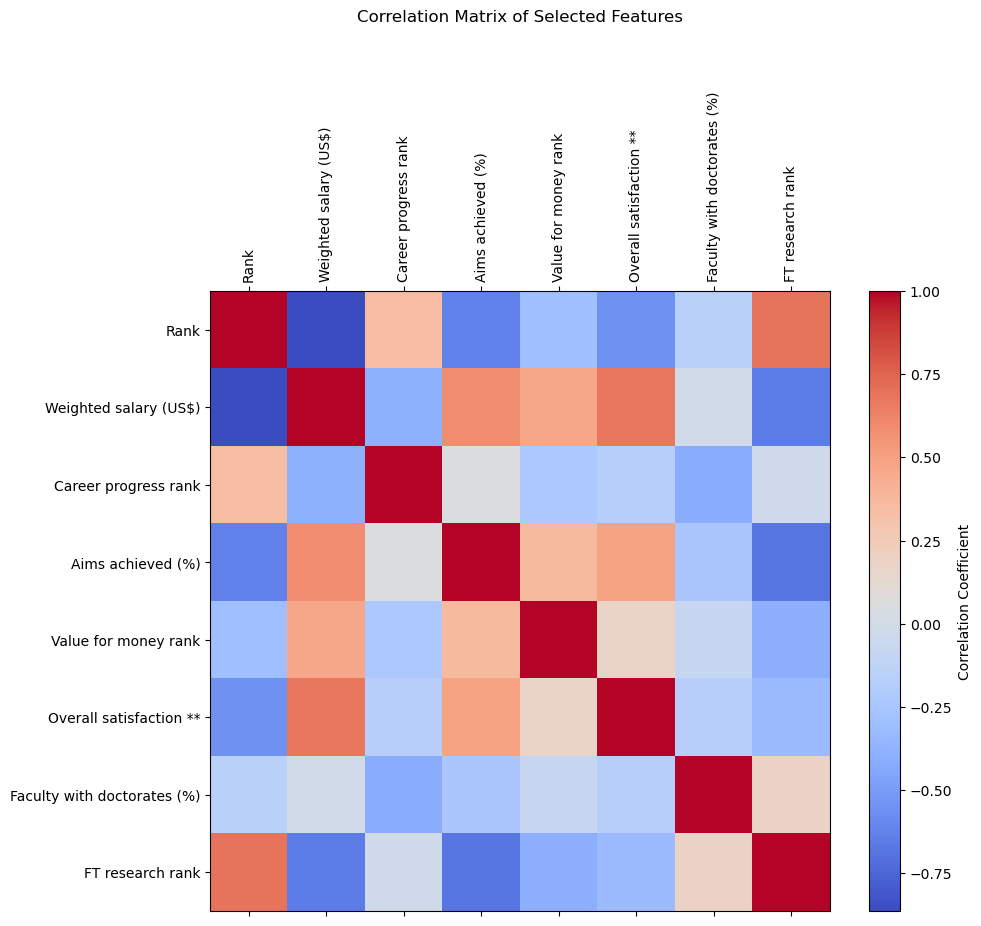

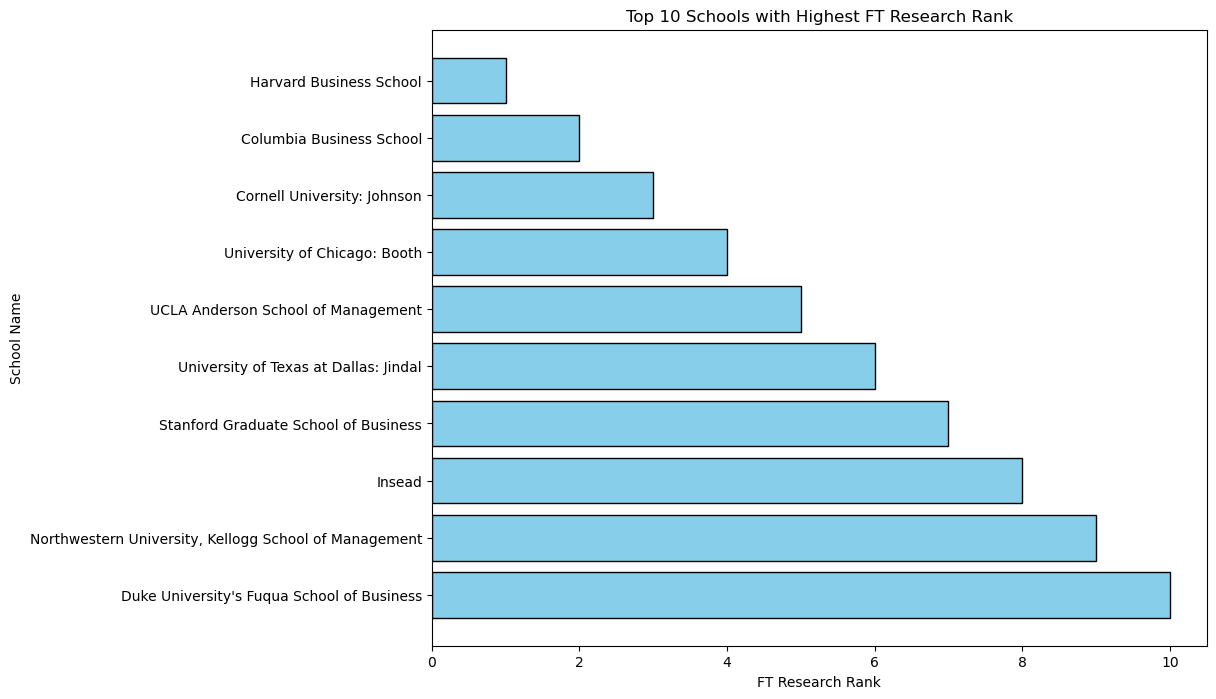

In [47]:
# Adjust selected features
selected_features = ['Rank', 'Weighted salary (US$)', 'Career progress rank', 'Aims achieved (%)', 'Value for money rank', 'Overall satisfaction **', 'Faculty with doctorates (%)', 'FT research rank']
correlation_matrix = df[selected_features].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10,8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(selected_features)), selected_features, rotation=90)
plt.yticks(range(len(selected_features)), selected_features)
plt.title('Correlation Matrix of Selected Features', pad=50)
plt.show()

# Top 10 schools with the highest 'FT research rank'
top_10_research = df.nsmallest(10, 'FT research rank')

# Plotting the top 10 schools with the highest 'FT research rank'
plt.figure(figsize=(10,8))
plt.barh(top_10_research['School Name'], top_10_research['FT research rank'], color='skyblue', edgecolor='black')
plt.title('Top 10 Schools with Highest FT Research Rank')
plt.xlabel('FT Research Rank')
plt.ylabel('School Name')
plt.gca().invert_yaxis()  # Invert y-axis to have the school with the highest rank at the top
plt.show()


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


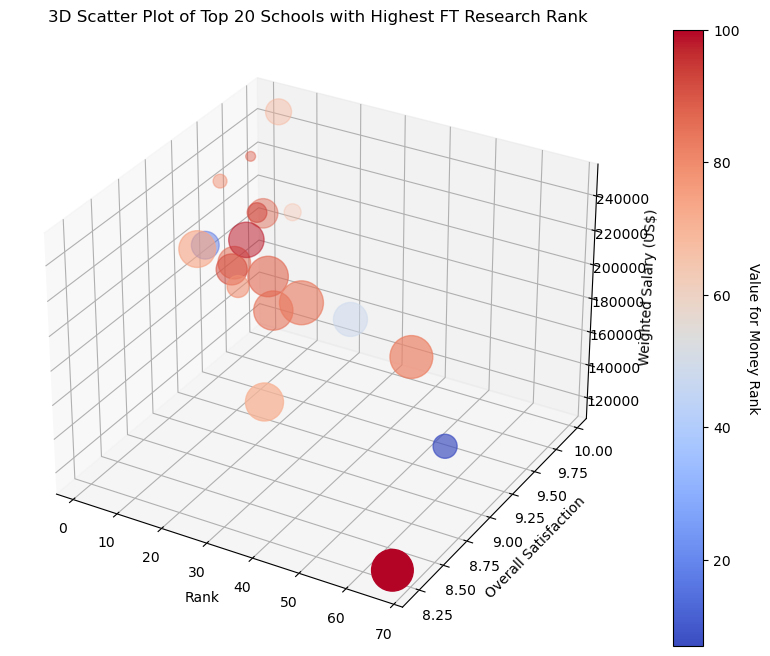

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the top 20 schools with the highest 'FT Research Rank'
top_20_research = df.nsmallest(20, 'FT research rank')

# Create the 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot points with different sizes and colors
sc = ax.scatter(top_20_research['Rank'], top_20_research['Overall satisfaction **'], top_20_research['Weighted salary (US$)'], 
                s=top_20_research['FT research rank'] * 50, c=top_20_research['Value for money rank'], cmap='coolwarm')

# Set labels and title
ax.set_xlabel('Rank')
ax.set_ylabel('Overall Satisfaction')
ax.set_zlabel('Weighted Salary (US$)')
ax.set_title('3D Scatter Plot of Top 20 Schools with Highest FT Research Rank')

# Add a colorbar to the plot
cbar = fig.colorbar(sc)
cbar.set_label('Value for Money Rank', rotation=270, labelpad=15)

# Show the plot
plt.show()


In [49]:
import plotly.express as px

# Filter the top 20 schools with the highest 'FT Research Rank'
top_20_research = df.nsmallest(20, 'FT research rank')

# Create an interactive 3D scatter plot
fig = px.scatter_3d(top_20_research, x='Rank', y='Overall satisfaction **', z='Weighted salary (US$)',
                    size='FT research rank', color='Value for money rank', hover_name='School Name',
                    color_continuous_scale='Viridis')

# Set axis labels and title
fig.update_layout(scene=dict(xaxis_title='Rank', yaxis_title='Overall Satisfaction', zaxis_title='Weighted Salary (US$)'),
                  title='Top 20 Schools with Highest FT Research Rank')

# Show the plot
fig.show()


In [50]:
import plotly.graph_objects as go

# Filter the top 20 schools with the highest 'FT Research Rank'
top_20_research = df.nsmallest(20, 'FT research rank')

# Create an interactive 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=top_20_research['Rank'],
    y=top_20_research['Overall satisfaction **'],
    z=top_20_research['Weighted salary (US$)'],
    mode='markers',
    marker=dict(
        size=top_20_research['FT research rank'] * 10,
        color=top_20_research['Value for money rank'],
        colorscale='Viridis',
        opacity=0.8,
        colorbar=dict(title='Value for Money Rank')
    ),
    text=top_20_research['School Name'],
)])

# Set axis labels and title
fig.update_layout(
    scene=dict(
        xaxis_title='Rank',
        yaxis_title='Overall Satisfaction',
        zaxis_title='Weighted Salary (US$)',
    ),
    title='Top 20 Schools with Highest FT Research Rank',
)

# Show the plot
fig.show()


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



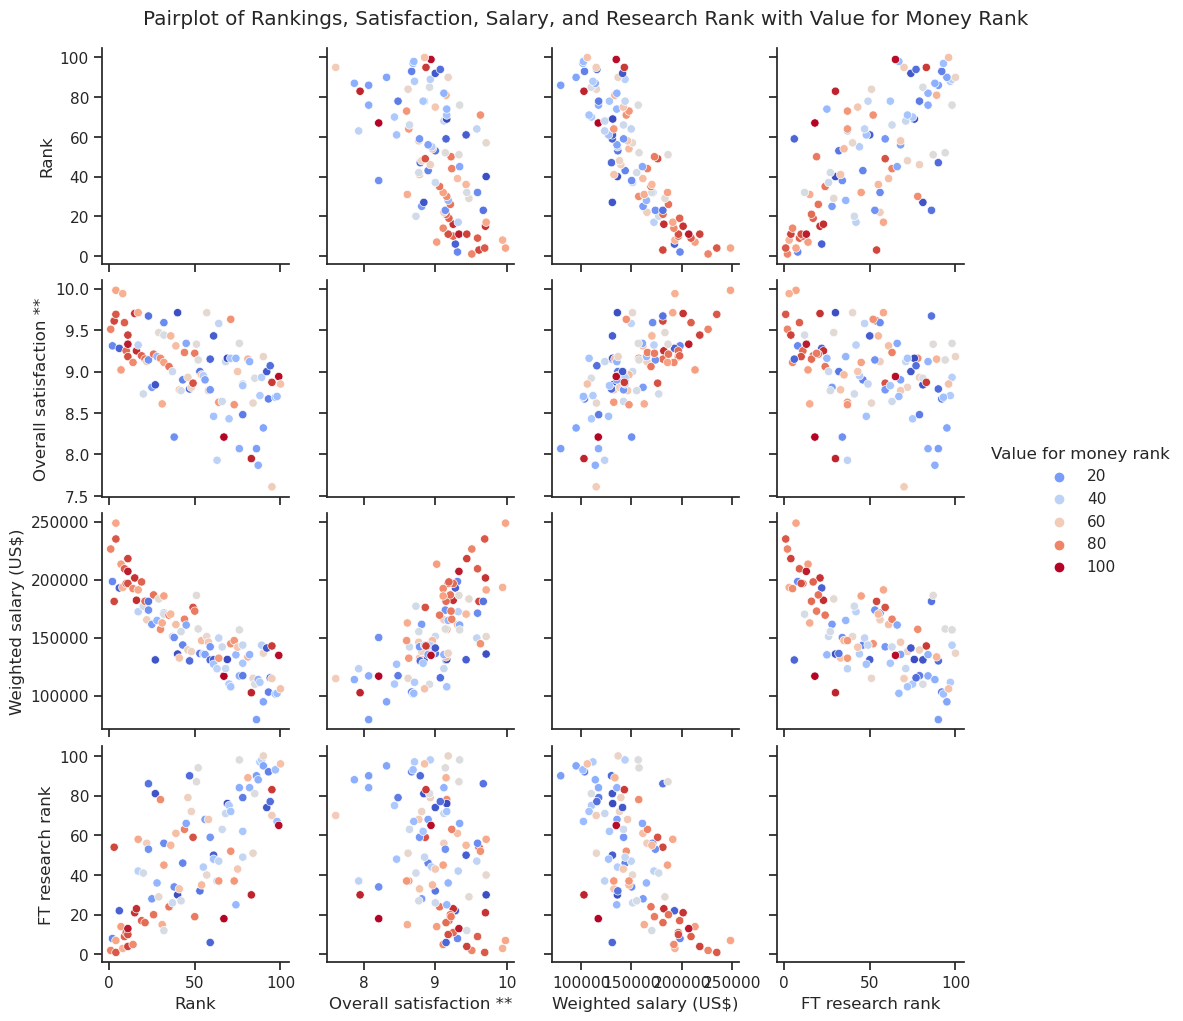

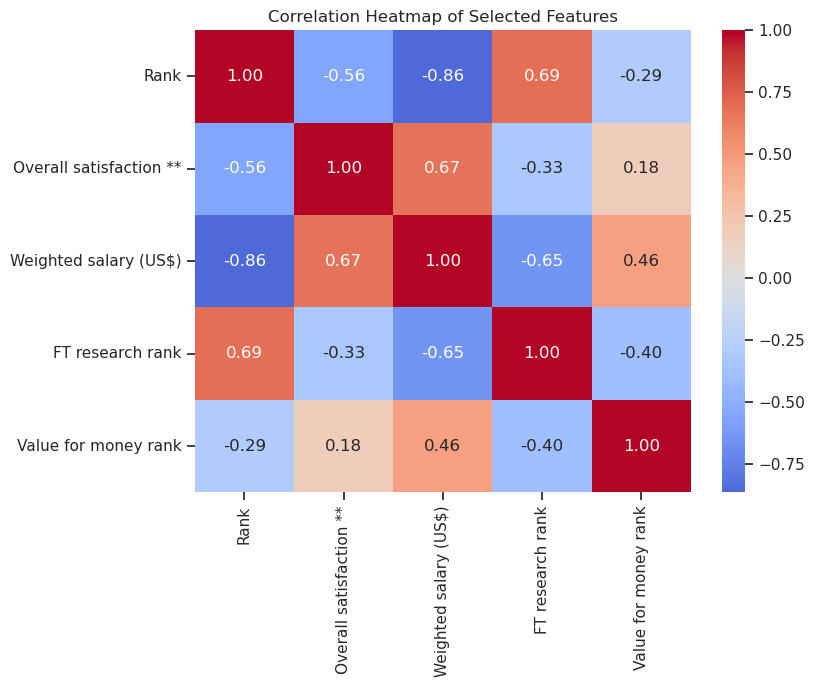

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot with custom color palette
sns.set(style='ticks')
sns.pairplot(df, vars=['Rank', 'Overall satisfaction **', 'Weighted salary (US$)', 'FT research rank'], hue='Value for money rank', palette='coolwarm')
plt.suptitle('Pairplot of Rankings, Satisfaction, Salary, and Research Rank with Value for Money Rank', y=1.02)
plt.show()

# Heatmap of correlations between selected features
selected_features = ['Rank', 'Overall satisfaction **', 'Weighted salary (US$)', 'FT research rank', 'Value for money rank']
correlation_matrix = df[selected_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Correlation Heatmap of Selected Features')
plt.show()


In [52]:
import plotly.graph_objects as go

# Filter the top 20 schools with the highest 'FT Research Rank'
top_20_research = df.nsmallest(20, 'FT research rank')

# Create an interactive 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=top_20_research['Rank'],
    y=top_20_research['Overall satisfaction **'],
    z=top_20_research['Weighted salary (US$)'],
    mode='markers',
    marker=dict(
        size=top_20_research['FT research rank'] * 10,
        color=top_20_research['Value for money rank'],
        colorscale='Viridis',
        opacity=0.8,
        colorbar=dict(title='Value for Money Rank')
    ),
    text=top_20_research['School Name'],
)])

# Set axis labels and title
fig.update_layout(
    scene=dict(
        xaxis_title='Rank',
        yaxis_title='Overall Satisfaction',
        zaxis_title='Weighted Salary (US$)',
    ),
    title='Top 20 Schools with Highest FT Research Rank',
)

# Show the plot
fig.show()


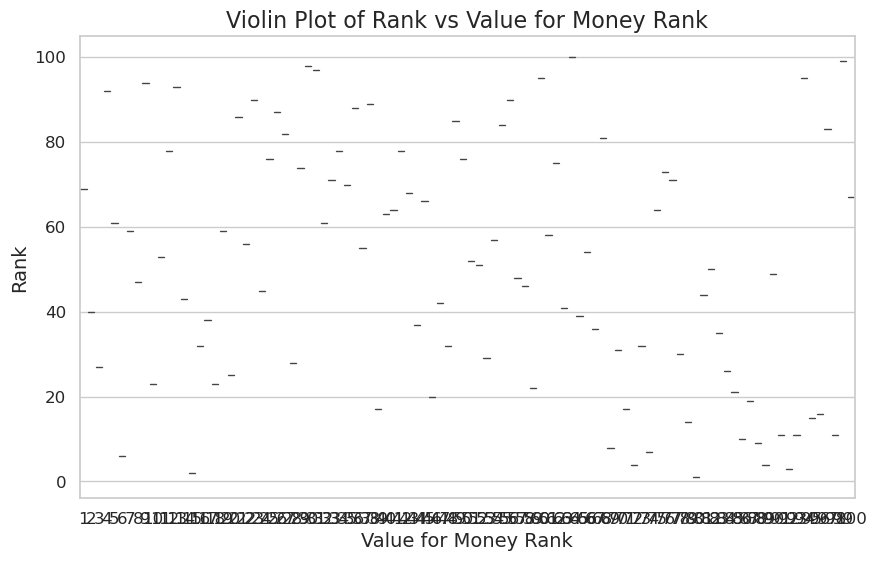

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin plot of 'Rank' vs 'Value for money rank' with custom palette
sns.set_theme(style='whitegrid', palette='coolwarm')
plt.figure(figsize=(10, 6))
sns.violinplot(x='Value for money rank', y='Rank', data=df, scale='width', inner='quart', cut=0, linewidth=1)
plt.title('Violin Plot of Rank vs Value for Money Rank', fontsize=16)
plt.xlabel('Value for Money Rank', fontsize=14)
plt.ylabel('Rank', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


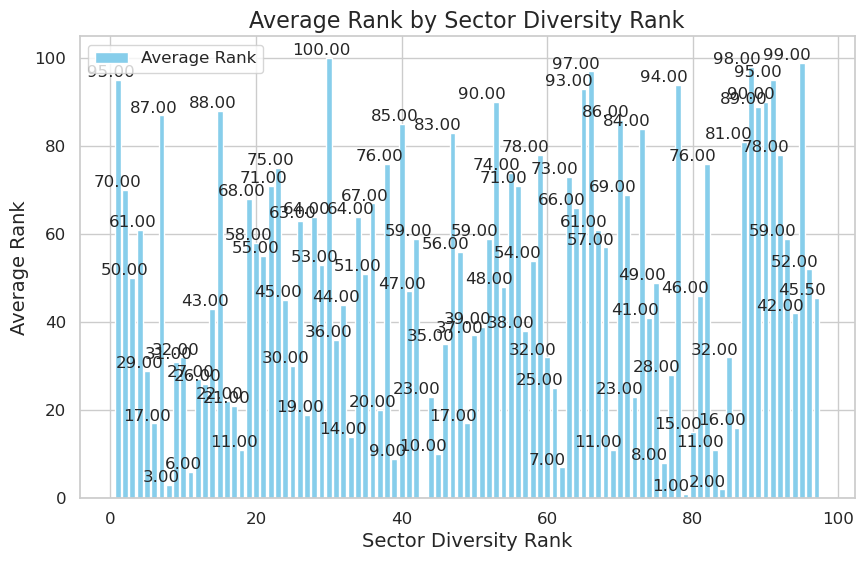

In [54]:
import matplotlib.pyplot as plt

# Calculate average ranks by sector diversity rank
average_ranks_by_sector_diversity = df.groupby('Sector diversity rank')['Rank'].mean()

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_ranks_by_sector_diversity.index, average_ranks_by_sector_diversity.values, color='skyblue', label='Average Rank')
plt.title('Average Rank by Sector Diversity Rank', fontsize=16)
plt.xlabel('Sector Diversity Rank', fontsize=14)
plt.ylabel('Average Rank', fontsize=14)

# Add text labels on top of the bars
for index, value in enumerate(average_ranks_by_sector_diversity.values):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [55]:
import plotly.graph_objects as go

# Create an interactive sunburst chart to visualize sector diversity rank and average rank
fig = go.Figure(go.Sunburst(
    labels=df['Sector diversity rank'],
    parents=df['Rank'],
    values=df['Rank'],
    branchvalues='total',
))

# Set title and layout
fig.update_layout(title_text='Sector Diversity Rank and Average Rank Sunburst Chart',
                  title_x=0.5,
                  sunburstcolorway=["#f3cec9", "#e7a4b5", "#cc779e", "#8c4d7f", "#42253b"])

# Show the plot
fig.show()


/tmp/ipykernel_21/66135895.py:6: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning:

50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



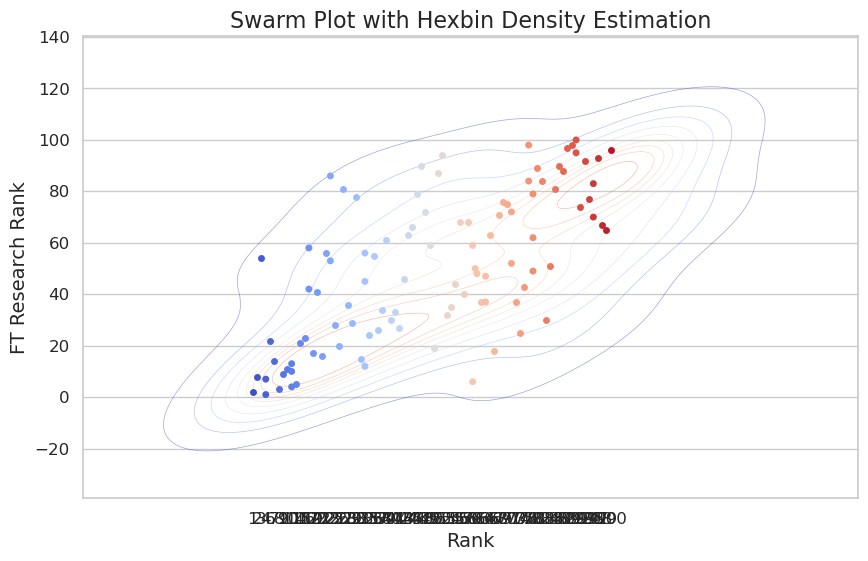

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a swarm plot with hexbin density estimation
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Rank', y='FT research rank', data=df, palette='coolwarm')
sns.kdeplot(x='Rank', y='FT research rank', data=df, cmap='coolwarm', n_levels=10, alpha=0.5, linewidths=0.5)
plt.title('Swarm Plot with Hexbin Density Estimation', fontsize=16)
plt.xlabel('Rank', fontsize=14)
plt.ylabel('FT Research Rank', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [57]:
!pip install pychord
!pip install chord


In [58]:
import pandas as pd
import plotly.graph_objects as go

# Sample data for demonstration
data = pd.DataFrame({
    'X': [1, 2, 3, 4, 5],
    'Y': [10, 8, 6, 4, 2],
    'Size': [100, 200, 300, 400, 500],
    'Color': ['red', 'blue', 'green', 'yellow', 'purple']
})

# Create the scatter plot
fig = go.Figure()

# Add the scatter trace with custom marker size and color
fig.add_trace(go.Scatter(
    x=data['X'],
    y=data['Y'],
    mode='markers',
    marker=dict(
        size=data['Size'],
        color=data['Color'],
        opacity=0.7,
        line=dict(width=2, color='black')
    ),
    text=data['Size'],
    hoverinfo='text'
))

# Set title and axis labels
fig.update_layout(
    title_text='Super High-Level Interactive Scatter Plot',
    xaxis_title='X-Axis',
    yaxis_title='Y-Axis',
)

# Show the plot
fig.show()


In [59]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sample data for demonstration
data = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'D'],
    'Value1': [10, 20, 15, 25],
    'Value2': [5, 15, 10, 20]
})

# Create subplots with two rows and one column
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1, subplot_titles=('Value1', 'Value2'))

# Add bar traces for Value1 and Value2
fig.add_trace(go.Bar(x=data['Category'], y=data['Value1'], name='Value1'), row=1, col=1)
fig.add_trace(go.Bar(x=data['Category'], y=data['Value2'], name='Value2'), row=2, col=1)

# Update layout and axis labels
fig.update_layout(
    title_text='Super High-Level Interactive Bar Chart with Subplots',
    xaxis_title='Category',
    yaxis_title='Value',
    height=600
)

# Show the plot
fig.show()


In [60]:
import numpy as np
import plotly.graph_objects as go

# Define the mathematical function to visualize
def func(x, y):
    return np.sin(np.sqrt(x**2 + y**2)) / (np.sqrt(x**2 + y**2))

# Generate data for the 3D surface plot
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

# Create the 3D surface plot
fig = go.Figure()

# Add the surface trace
fig.add_trace(go.Surface(z=Z, x=x, y=y))

# Add contour lines for better visualization
fig.add_trace(go.Contour(z=Z, x=x, y=y, contours=dict(coloring='lines', showlabels=True, labelfont=dict(size=12))))

# Update layout and axis labels
fig.update_layout(
    title_text='3D Surface Plot with Contours',
    scene=dict(
        xaxis_title='X-axis',
        yaxis_title='Y-axis',
        zaxis_title='Z-axis',
    ),
)

# Show the plot
fig.show()


In [61]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Sample data for demonstration
np.random.seed(42)
x = np.linspace(0, 10, 50)
y = 2 * x + 1 + np.random.normal(0, 2, len(x))
error = np.random.normal(0, 1, len(x))

# Create a DataFrame with the data and errors
data = pd.DataFrame({'x': x, 'y': y, 'error': error})

# Create the scatter plot
fig = go.Figure()

# Add scatter trace with error bars
fig.add_trace(go.Scatter(
    x=data['x'],
    y=data['y'],
    mode='markers',
    error_y=dict(
        type='data',
        symmetric=True,
        array=data['error'],
        color='rgba(0,0,0,0.3)',
        thickness=1,
        width=3
    ),
    marker=dict(
        size=8,
        color='blue'
    ),
    name='Data'
))

# Fit a trend line to the data
fit_coefficients = np.polyfit(data['x'], data['y'], 1)
trend_line = fit_coefficients[0] * data['x'] + fit_coefficients[1]

# Add trend line trace
fig.add_trace(go.Scatter(
    x=data['x'],
    y=trend_line,
    mode='lines',
    line=dict(color='red', width=2),
    name='Trend Line'
))

# Update layout and axis labels
fig.update_layout(
    title_text='Advanced Interactive Scatter Plot with Trend Line and Error Bars',
    xaxis_title='X-axis',
    yaxis_title='Y-axis',
)

# Show the plot
fig.show()
